**KMeans Clustering** submission by Nguyen Anh Tu @ DSEB 62 NEU

# Problem 1
Implement k-means algorithm using numpy

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [182]:
class KMeans:
  def __init__(self, k, data):
    """self._k: the number of clusters
    self._x: the data
    self._mu: centroid vector
    self._flag: flag vector store the cluster of each point"""
    self._k = k
    self._x = np.array(data)
    self._mu = None
    self._flag = np.zeros(self._x.shape[0])

  def get_distortion(self):
    # distortion is the overall distance from each point to its centroid
    distortion = 0
    for i in range(self._x.shape[0]):
      label = int(self._flag[i])
      distortion += np.linalg.norm(self._x[i] - self._mu[label])
    return distortion
  
  def cluster(self, threshold):
    # initialize centroid vectors mu by randomly choose k datapoints
    x = self._x.copy()
    np.random.shuffle(x)
    self._mu = x[:self._k]
    last_mu = self._mu.copy()
    stop = np.ones(self._k)

    while True:
      # find closest centroid for each point
      for i in range(self._x.shape[0]):
        distances = ((self._x[i] - self._mu) ** 2).sum(axis=1)
        self._flag[i] = np.argmin(distances, axis = 0)

      # move centroids
      for k in range(self._mu.shape[0]):
        self._mu[k] = (self._x[self._flag == k]).mean(axis=0)
        stop[k] = ((self._mu[k] - last_mu[k]) ** 2).sum() >= 0.00001
      
      #if stop.sum() == 0: solution 1: converge criteria when centroids move just unremarkably
        #break
      distortion = self.get_distortion() / self._x.shape[0] # solution 2: converge criteria when distortion measure reaches a threshold
      if distortion <= threshold:
        break
      else:
        last_mu = self._mu

    return self._mu, self._flag

In [106]:
def visualize_data(data, label, centroids):
  for i in range(centroids.shape[0]):
    plt.scatter(data[label == i, 0], data[label == i, 1], alpha=0.5)
  plt.scatter(centroids[:, 0], centroids[:, 1], c = 'cyan', s=100)

# Problem 2
Create at least three toy dataset [Link](https://scikit-learn.org/stable/datasets/sample_generators.html), then apply kmean algorithm built in the first question? Try different number of cluster to see how the result change?

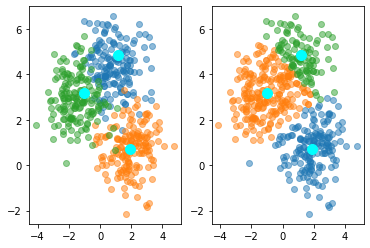

In [195]:
# Trial on dataset 1
n_cluster = 3
x1, y1 = make_blobs(n_samples=500, centers=n_cluster, n_features=2, random_state=0)
k = KMeans(n_cluster, x1)
mu, f = k.cluster(threshold = 10)

plt.subplot(121)
visualize_data(x1, y1, mu)

plt.subplot(122)
visualize_data(x1, f, mu)

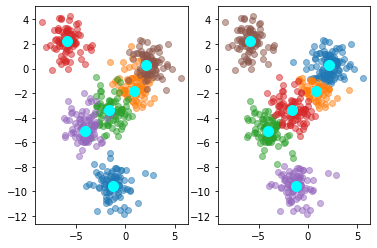

In [202]:
# Trial on dataset 2
n_cluster = 6
x2, y2 = make_blobs(n_samples=500, centers=n_cluster, n_features=2, random_state=2)
k = KMeans(n_cluster, x2)
mu2, f2 = k.cluster(threshold=5)

plt.subplot(121)
visualize_data(x2, y2, mu2)

plt.subplot(122)
visualize_data(x2, f2, mu2)

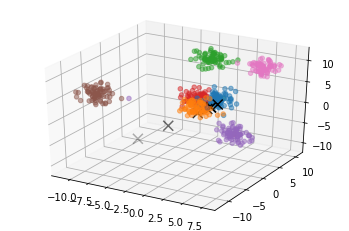

In [204]:
# Trial on dataset 3
n_cluster = 7
x3, y3 = make_blobs(n_samples=500, centers=n_cluster, n_features=3, random_state=0)
k = KMeans(n_cluster, x3)
mu3, f3 = k.cluster(threshold = 4)
temp = np.vstack((x3, mu3))
y3 = np.concatenate((y3, np.arange(n_cluster)))
n = x3.shape[0]

ax1 = plt.axes(projection='3d')
for i in range(n_cluster):
  ax1.scatter3D(temp[y3 == i, 0], temp[y3 == i, 1], temp[y3 == i, 2], alpha=0.5)
ax1.scatter3D(temp[n:, 0], temp[n:, 0], temp[n:, 0], c='black', marker = 'x', s = 100)

Comment:
- Clustering performance heavily depends on the initialization of centroid vector.
- Code cells above are executed multiple times to select best performance, however, the algorithm works not well on high dim data.

# Problem 3
Read and understand how to choose k [Link](https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/), draw the elbow for the above dataset.

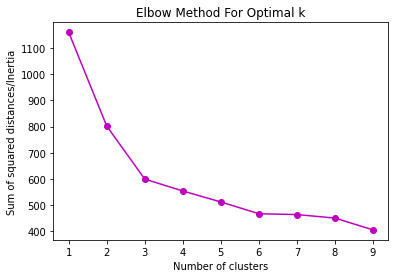

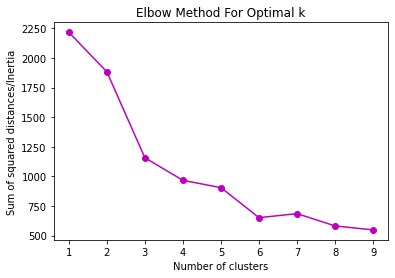

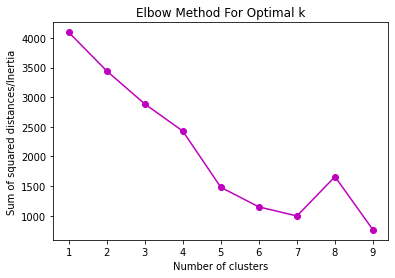

In [177]:
def elbow_curve_visualize(x, max_cluster):
  distances = []
  clusters = range(1, max_cluster)
  for n_cluster in clusters:
    k = KMeans(n_cluster, x)
    mu, f = k.cluster()
    d = k.get_distortion()
    distances.append(d)
  plt.plot(clusters, distances, 'mo-')
  plt.xlabel('Number of clusters') 
  plt.ylabel('Sum of squared distances/Inertia') 
  plt.title('Elbow Method For Optimal k')
  plt.show()

elbow_curve_visualize(x1, 10)
elbow_curve_visualize(x2, 10)
elbow_curve_visualize(x3, 10)

# Problem 4
Read the limitation of kmean [Link](https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages), find at least three example k-mean doesn't work.

Answer: KMeans can fail in some cases such as:
- We try to use KMeans on non-clustered data.
- K-means has trouble clustering data where clusters are of varying sizes and density because it only takes into account the distances of centroids and datapoints, not mentioning any assumptions about the distribution of the dataset. If clusters have different variances, then the distances from true centroids to their cluster boundary will be variable. Meanwhile, in Kmeans we notice that the distance from two centroids to their mutual boundary is usually
equal. The figure below is an example:
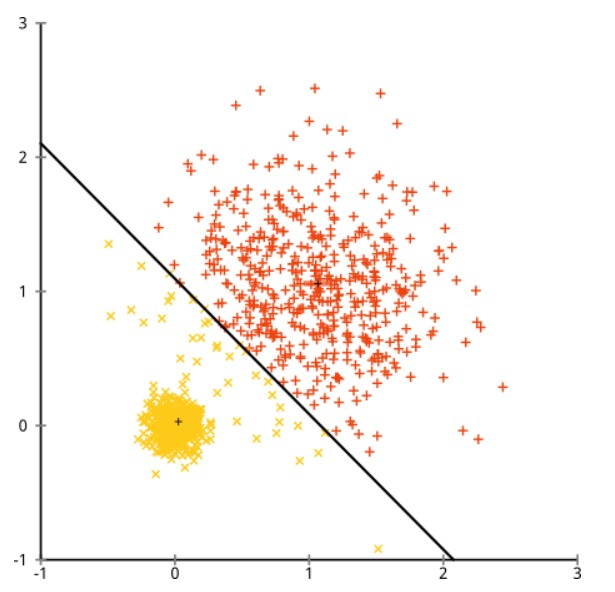

The true clustering should look like this:
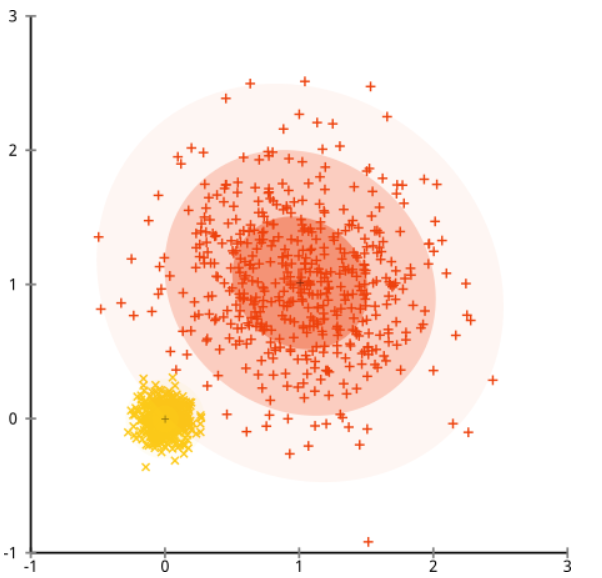

- KMeans has trouble with high dimensional data as well. As the number of dimensions increases, a distance-based similarity measure converges to a constant value between any given examples. These plots show how the ratio of the standard deviation to the mean of distance between examples decreases as the number of dimensions increases. This convergence means k-means becomes less effective at distinguishing between examples. This negative consequence of high-dimensional data is called the curse of dimensionality.

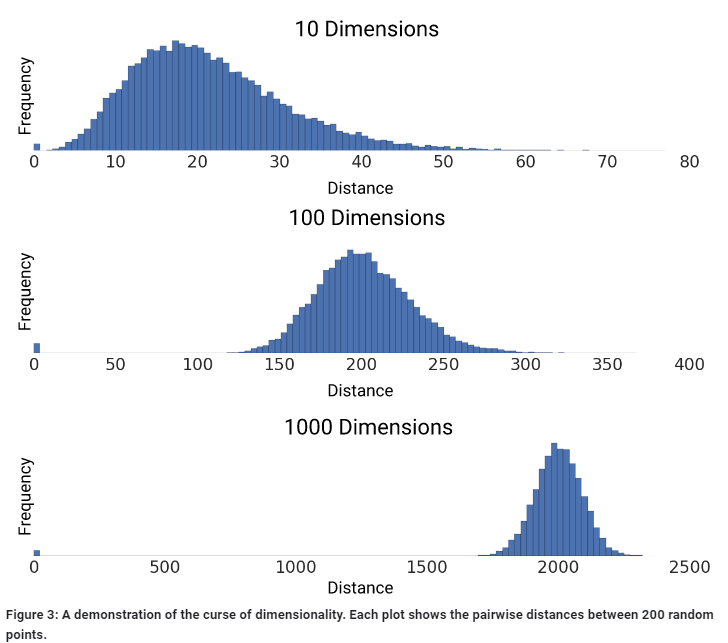

However, this problem can be solved by performing dimensional reduction algorithms on dataset (e.g PCA, tsne...) before applying KMeans.

- Another example is when running k-means on binary data (or one-hot encoded categorical data), the results will not be binary anymore. We do get a result out, but you may be unable to interpret it in the end, because it has a different data type than your original data.

*   Finally, KMeans heavily depends on the initialization of centroids, in many cases it will be trapped in local minimas (positions that lead to convergence but not the correct centroids) because centroids are placed near the trap at first. This can also happen when the dataset have many local minimas. It is hard to solve this, all we can do is run the algorithm again and wish for the luck of randomly good initialization.

Example:

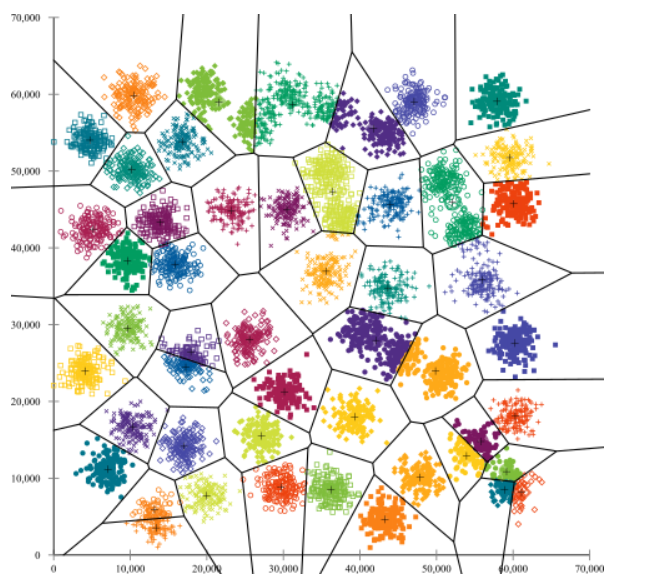
